In [108]:
%matplotlib inline
import matplotlib.pyplot as plt
import rebound
import reboundx
import numpy as np
from reboundx import constants

Nout = 1000
maxorb = 1.e4
C2 = 1.e6
dt = 7.e-2

def run(rebintegrator, rebxintegrator, order, force_as_operator):
    sim = rebound.Simulation()
    sim.add(m=1.)
    sim.add(m=1.e-3, a=1., e=0.1)
    #sim.add(m=1.e-8, a=2., e=0.1)
    sim.move_to_com()
    sim.integrator=rebintegrator
    sim.dt = dt*sim.particles[1].P
    rebx = reboundx.Extras(sim)
    rebx.integrator = rebxintegrator
    gr = rebx.add("gr")
    gr.params["c"] = np.sqrt(C2)
    gr.operator_order = order
    gr.force_as_operator = force_as_operator
    Eerr = np.zeros(Nout)
    E0 = rebx.gr_hamiltonian(sim, gr)
    times = np.logspace(np.log10(dt),np.log10(maxorb*sim.particles[1].P),Nout)
    for i, time in enumerate(times):
        sim.integrate(time, exact_finish_time=0)
        E = rebx.gr_hamiltonian(sim, gr)
        Eerr[i] = abs((E-E0)/E0)
    return Eerr

In [109]:
%%time
Eerrimpmid = run("whfast", "implicit_midpoint", 2, 1)

CPU times: user 648 ms, sys: 4.92 ms, total: 653 ms
Wall time: 650 ms


In [110]:
%%time
Eerrnaive = run("whfast", "none", 2, 0)

/Users/dtamayo/Documents/workspace/rebound/rebound/simulation.py:508: RuntimeWarning: REBOUNDx: Passing a velocity-dependent force to WHFAST. Need to apply as an operator.
  warnings.warn(msg[1:], RuntimeWarning)


CPU times: user 204 ms, sys: 2.32 ms, total: 207 ms
Wall time: 205 ms


In [111]:
%%time
Eerreuler = run("whfast", "euler", 2, 1)

CPU times: user 228 ms, sys: 2.41 ms, total: 231 ms
Wall time: 229 ms


In [112]:
%%time
Eerrnone = run("whfast", "none", 2, 1)

CPU times: user 85 ms, sys: 1.46 ms, total: 86.4 ms
Wall time: 85.3 ms


In [113]:
%%time
#Eerrias15 = run("ias15", "none", 1, 0)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.96 µs


CPU times: user 112 ms, sys: 2.38 ms, total: 114 ms
Wall time: 113 ms


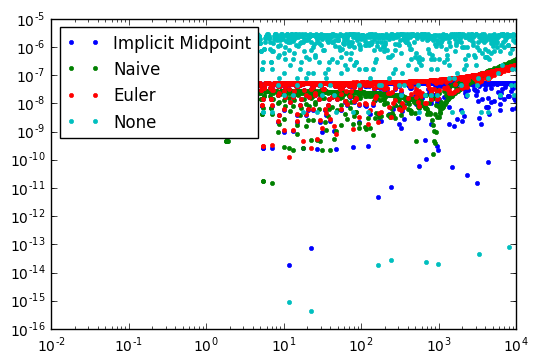

In [114]:
%%time
fig, ax = plt.subplots()
ax.plot(times, Eerrimpmid, '.', label='Implicit Midpoint')
ax.plot(times, Eerrnaive, '.', label='Naive')
ax.plot(times, Eerreuler, '.', label='Euler')
ax.plot(times, Eerrnone, '.', label='None')
#ax.plot(times, Eerrias15, '.', label='ias15')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc='upper left')